# Part 01
### Optimize SVM Parameters (C and Gamma) on RBF Kernel
#### GA

#### Alunos: Camilla Rocha & Tácio Nery

In [1]:
# imports
import random
import numpy
import math
import operator

from deap import base, creator, tools, algorithms, benchmarks

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston
from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
db = load_boston()

In [3]:
creator.create("Fitness", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.Fitness, speed=list)

In [4]:
toolbox = base.Toolbox()

c_min = math.pow(2, -15)
c_max = math.pow(2, 3)
g_min = math.pow(2, -5)
g_max = math.pow(2, 15)

toolbox.register("c", random.uniform, c_min, c_max)
toolbox.register("gamma", random.uniform, g_min, g_max)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.c, toolbox.gamma), 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [5]:
def evaluate(individual):
    # X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)
    X = db.data
    y = db.target
    
    clf = SVR(kernel='rbf', C=individual[0], gamma=individual[1])
    
    scores = cross_val_score(clf, X, y, cv=5)
    acc = scores.mean()
#     print(acc)
    
    return acc,

In [6]:
def custom_mutation(ind):
    ind[0] = ind[0] * random.uniform(c_min, c_max)
    ind[1] = ind[1] * random.uniform(g_min, g_max)
    return ind,

In [7]:
toolbox.register("evaluate", evaluate)
toolbox.register("mutate", custom_mutation)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("select", tools.selTournament, tournsize=3)

In [8]:
def main():
    ngen = 500
    cxpb = 0.7
    mutpb = 0.2
    
    pop = toolbox.population(n=20)
    hof = tools.ParetoFront()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, 
                                       stats=stats, halloffame=hof, verbose=False)
    
    return pop, log, hof

In [9]:
def plot(items):
    gens = []
    avgs = []
#     print(items)
    for item in items:
        gens.append(item['gen'])
        avgs.append(item['avg'])
    
    plt.plot(gens, avgs)

gen	nevals	avg      	std        	min      	max      
0  	20    	-0.596772	0.021305   	-0.630376	-0.569992
1  	16    	-0.585666	0.0334128  	-0.723806	-0.569992
2  	15    	-0.57488 	0.0173155  	-0.649915	-0.569992
3  	13    	-0.577827	0.0241703  	-0.666497	-0.569992
4  	15    	-0.578623	0.0262323  	-0.669701	-0.569992
5  	17    	-0.59515 	0.0367485  	-0.669956	-0.569992
6  	15    	-0.583974	0.0332965  	-0.665078	-0.569992
7  	14    	-0.597466	0.0394642  	-0.67094 	-0.569992
8  	9     	-0.581313	0.0259072  	-0.673537	-0.569992
9  	17    	-0.583101	0.0314591  	-0.667847	-0.569992
10 	13    	-0.578194	0.024853   	-0.663096	-0.569992
11 	16    	-0.582425	0.0299193  	-0.667099	-0.569992
12 	17    	-0.590572	0.0432634  	-0.723806	-0.569992
13 	15    	-0.574695	0.0200925  	-0.662259	-0.569992
14 	14    	-0.583398	0.0280435  	-0.657061	-0.569992
15 	12    	-0.577725	0.023656   	-0.664992	-0.569992
16 	16    	-0.58279 	0.0309443  	-0.668897	-0.569992
17 	16    	-0.584591	0.034524   	-0.67595 	-0.

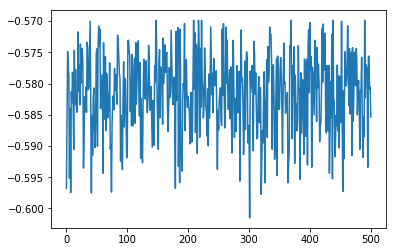

In [10]:
if __name__ == "__main__":
    results = main()
    print(results[1])
    plot(results[1])